# Disney Data Analysis

本项目使用Disney的电影数据集。<br />

本数据集包含华特迪士尼影片公司（Walt Disney Pictures, WDP）从1930年代到2020年发行的迪士尼电影数据。<br />

## 数据集字段说明

title-电影名称<br />
Production company-电影制作公司<br />
Country-原产国<br />
Language-以哪种语言呈现的电影<br />
Running time-电影时长（以分钟为单位）<br />
Budget-电影预算（美元）<br />
Box office-电影的票房（美元）<br />
Release date-发布日期（日期时间）<br />
imdb-imbd评分<br />
metascore-metascore（电影的评分）<br />
rotten_tomatoes-烂番茄得分（电影质量）<br />
Directed by-电影导演<br />
Produced by-电影制作<br />
Based on-电影基于的电影<br />
Starring-主演<br />
Music by-电影音乐制作<br />
Distributed by-发行<br />
Cinematography-摄像<br />
Edited by-导演<br />
Screenplay by-编剧<br />

In [1]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 导入数据集
disney = pd.read_csv('/Users/miaoxuzhou/myFolder/homework/Disney.csv')

In [3]:
# 设置显示的列数和列宽，完整显示数据

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

通过查询disney数据集的‘Budget’列，发现部分数据在量级上与其他数据不一致，以下是明显偏小的‘Budget’。

In [4]:
disney['Budget'].sort_values()[0:30]

72           4.4
379          5.0
397          5.0
254         15.0
300         20.0
384         70.0
245         90.0
378         95.0
403        100.0
406        120.0
393        150.0
396        160.0
389        175.0
386        175.0
420        175.0
371        180.0
380        180.0
361        200.0
364        225.0
398        230.0
413        250.0
22      300000.0
4       600000.0
34      700000.0
8       788000.0
6       858000.0
5       950000.0
122    1000000.0
41     1000000.0
291    1000000.0
Name: Budget, dtype: float64

查询Wikipedia，上述电影的‘Budget’的单位均为百万级，因此乘以百万。

In [5]:
# 获取电影名称

disney[disney['Budget'] < 300]

,Unnamed: 0,title,Production company,Country,Language,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Based on,Starring,Music by,Distributed by,Cinematography,Edited by,Screenplay by
72,72,Mary Poppins,Walt Disney Productions,United States,English,139.0,4.4,1.031000e+08,1964-08-27,7.8,88.0,100%,Robert Stevenson,Walt Disney,"['Mary Poppins', 'by', 'P. L. Travers']","['Julie Andrews', 'Dick Van Dyke', 'David Tomlinson', 'Glynis Johns', 'Hermione Baddeley', 'Karen Dotrice', 'Matthew Garber', 'Elsa Lanchester', 'Arthur Treacher', 'Reginald Owen', 'Ed Wynn']","['Richard M. Sherman', 'Robert B. Sherman']",Buena Vista Distribution,Edward Colman,Cotton Warburton,"['Bill Walsh', 'Don DaGradi']"
245,245,Atlantis: The Lost Empire,"['Walt Disney Pictures', 'Walt Disney Feature Animation']",United States,English,96.0,90.0,1.861000e+08,2001-06-03,6.9,52.0,49%,"['Gary Trousdale', 'Kirk Wise']",Don Hahn,NaN,"['Michael J. Fox', 'James Garner', 'Cree Summer', 'Don Novello', 'Phil Morris', 'Claudia Christian', 'Jacqueline Obradors', 'Florence Stanley', 'David Ogden Stiers', 'John Mahoney', 'Jim Varney', 'Corey Burton', 'Leonard Nimoy']",James Newton Howard,Buena Vista Pictures,NaN,Ellen Keneshea,Tab Murphy
254,254,Spirited Away,Studio Ghibli,Japan,Japanese,125.0,15.0,NaN,2001-07-20,8.6,96.0,97%,Hayao Miyazaki,Toshio Suzuki,NaN,"['Rumi Hiiragi', 'Miyu Irino', 'Mari Natsuki', 'Takeshi Naito', 'Yasuko Sawaguchi', 'Tsunehiko Kamijō', 'Takehiko Ono', 'Bunta Sugawara']",Joe Hisaishi,Toho,Atsushi Okui,Takeshi Seyama,NaN
300,300,Bridge to Terabithia,NaN,United States,English,95.0,20.0,1.380000e+08,2007-02-16,7.1,74.0,85%,Gábor Csupó,"['David L. Paterson', 'Lauren Levine', 'Hal Lieberman']","['Bridge to Terabithia', 'by', 'Katherine Paterson']","['Josh Hutcherson', 'AnnaSophia Robb', 'Bailee Madison', 'Robert Patrick', 'Zooey Deschanel']",Aaron Zigman,"['Buena Vista Pictures Distribution', '(United States)', 'Summit Entertainment', '(International)']",Michael Chapman,John Gilbert,"['David L. Paterson', 'Jeff Stockwell']"
361,361,Oz the Great and Powerful,NaN,United States,English,130.0,200.0,4.933000e+08,2013-02-14,6.3,44.0,57%,Sam Raimi,Joe Roth,"['Oz', 'by', 'L. Frank Baum']","['James Franco', 'Mila Kunis', 'Rachel Weisz', 'Michelle Williams', 'Zach Braff', 'Bill Cobbs', 'Joey King', 'Tony Cox']",Danny Elfman,"['Walt Disney Studios', 'Motion Pictures']",Peter Deming,Bob Murawski,"['Mitchell Kapner', 'David Lindsay-Abaire']"
364,364,The Lone Ranger,"['Walt Disney Pictures', 'Jerry Bruckheimer Films', 'Infinitum Nihil', 'Blind Wink Productions']",United States,English,149.0,225.0,2.605000e+08,2013-06-22,6.4,37.0,30%,Gore Verbinski,"['Jerry Bruckheimer', 'Gore Verbinski']","['Fran Striker', 'George W. Trendle']","['Johnny Depp', 'Armie Hammer', 'Tom Wilkinson', 'William Fichtner', 'Barry Pepper', 'James Badge Dale', 'Helena Bonham Carter']",Hans Zimmer,"['Walt Disney Studios', 'Motion Pictures']",Bojan Bazelli,"['James Haygood', 'Craig Wood']","['Justin Haythe', 'Ted Elliott', 'Terry Rossio']"
371,371,Maleficent,"['Walt Disney Pictures', 'Roth Films']",United States,English,97.0,180.0,7.585000e+08,2014-05-28,7.0,56.0,54%,Robert Stromberg,Joe Roth,"[""Disney's Sleeping Beauty and"", 'La Belle au bois dormant written by Charles Perrault']","['Angelina Jolie', 'Sharlto Copley', 'Elle Fanning', 'Sam Riley', 'Imelda Staunton', 'Juno Temple', 'Lesley Manville']",James Newton Howard,Walt Disney Studios Motion Pictures,Dean Semler,"['Chris Lebenzon', 'Richard Pearson']",Linda Woolverton
378,378,Cinderella,"['Walt Disney Pictures', 'Kinberg Genre', 'Allison Shearmur Productions', 'Beagle Pug Films']","['United States', 'United Kingdom']",English,106.0,95.0,5.424000e+08,2015-02-13,6.9,67.0,83%,Kenneth Branagh,"['Simon Kinberg', 'Allison Shearmur', 'David Barron']","[""Disney's Cinderella"", 'Cendrillon by Charles Perrault']","['Cate Blanchett', 'Lily James', 'Richard Madden', 'Stellan Skarsgård', 'Holliday Grainger

In [6]:
# 将‘Budget’的数值乘以百万

index_list = disney[disney['Budget'] < 300].index
disney.loc[index_list, 'Budget'] = disney.loc[index_list, 'Budget'] * 1000000

In [7]:
# 检查修正后的结果

disney.loc[index_list, 'Budget']

72       4400000.0
245     90000000.0
254     15000000.0
300     20000000.0
361    200000000.0
364    225000000.0
371    180000000.0
378     95000000.0
379      5000000.0
380    180000000.0
384     70000000.0
386    175000000.0
389    175000000.0
393    150000000.0
396    160000000.0
397      5000000.0
398    230000000.0
403    100000000.0
406    120000000.0
413    250000000.0
420    175000000.0
Name: Budget, dtype: float64

# 1. 合作制作的电影一定是大片吗？请进行可视化探索并对结果分别进行解读，请从至少三个合理的角度出发。（3分）

## 请先给出各字段的缺失百分比（保留两位小数）

In [8]:
(disney.isnull().sum() / disney.shape[0]).map(lambda x: '{:.2%}'.format(x))

Unnamed: 0             0.00%
title                  0.00%
Production company    10.14%
Country                0.68%
Language               0.23%
Running time           3.15%
Budget                37.39%
Box office            19.37%
Release date           2.03%
imdb                   4.50%
metascore             34.01%
rotten_tomatoes       11.94%
Directed by            0.23%
Produced by            2.03%
Based on              50.23%
Starring               7.88%
Music by               2.48%
Distributed by         0.68%
Cinematography        20.72%
Edited by              9.01%
Screenplay by         54.05%
dtype: object

In [9]:
# 将“制作公司”字段数据从字符串转换为列表

def to_list(x):
    if x is np.nan:
        return ['No data']
    else:
        return x.strip('[').strip(']').split(',')

disney['Production company'] = disney['Production company'].apply(to_list)

In [10]:
# 新设“Category”字段，True表示合作制作，False表示单独制作

disney['Category'] = disney['Production company'].apply(lambda x: 'Co Production' if len(x) > 1 else 'Other')

In [11]:
# 分别取出合作制作电影、单独制作电影的数据

co_disney = disney[disney['Category'] == 'Co Production']
single_disney = disney[disney['Category'] == 'Other']

### 从预算角度判断大片

/Users/miaoxuzhou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


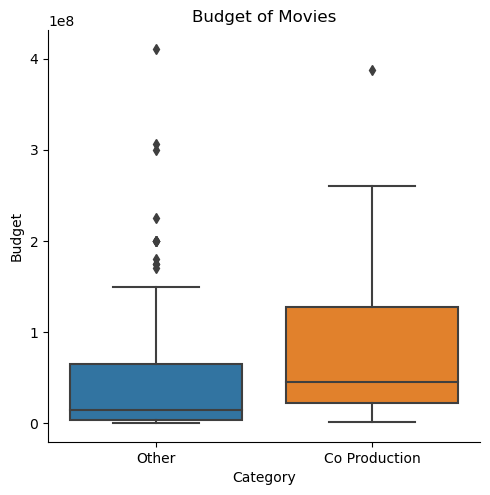

In [12]:
sns.catplot(x='Category', y='Budget', kind='box', data=disney)

plt.title('Budget of Movies')

plt.show()

上图中，合作制作电影的下四分位数、上四分位数、中位数和上边缘值均大于其他电影，似乎可以得出合作制作电影预算更高的结论。

但考虑到数据集的时间跨度很大，有通货膨胀的影响，所以，以下按照年代再计算一次。

In [13]:
# 取出发行年份
disney['Release_date'] = pd.to_datetime(disney['Release date'])
disney['Release year'] = disney['Release_date'].map(lambda x: x.year)

# 设置发行年代
def get_decade(x):
    if not(np.isnan(x)):
        return np.rint(int(x) // 10 * 10)

disney['Decade'] = disney['Release year'].apply(get_decade)

/Users/miaoxuzhou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x400 with 0 Axes>

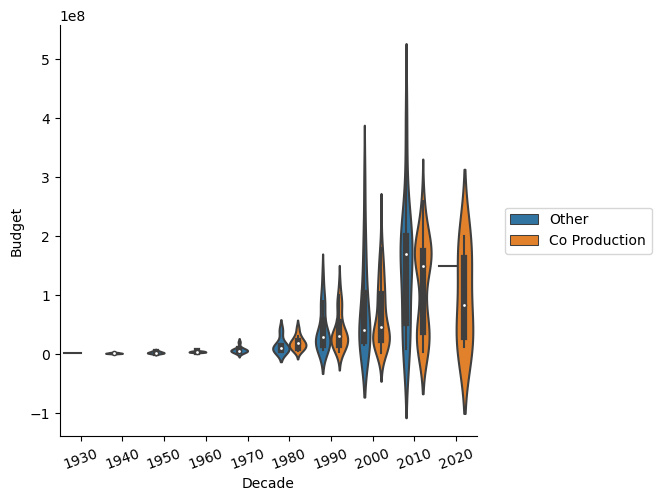

In [14]:
plt.figure(figsize=(18, 4))

budget_violin = sns.catplot(x='Decade', y='Budget', 
                            hue='Category', kind='violin', data=disney,
                            legend=False)

plt.xticks(range(disney['Decade'].nunique()),
    ['1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020'],
    rotation=20)

plt.legend(loc = 'center left', bbox_to_anchor=(1.05, 0.5))

plt.show()

上图显示，电影预算呈现逐渐升高的趋势，合作制作电影发行时间较晚，由此可以解释图一“合作制作电影总体上预算更高”的现象。

但是，在每个时间段，合作制作电影与其他电影在预算上的差距并不明显。甚至，预算最高的单部电影是其他电影。

不能得出合作制作电影预算更高的结论。

### 从票房角度判断大片

/Users/miaoxuzhou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


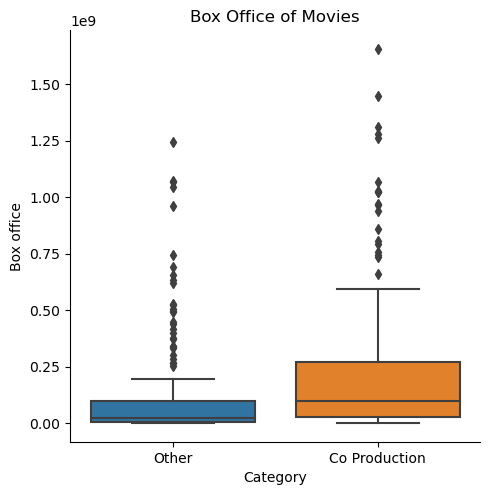

In [15]:
sns.catplot(x='Category', y='Box office', kind='box', data=disney)

plt.title('Box Office of Movies')

plt.show()

总体上，合作制作电影的票房更高。

/Users/miaoxuzhou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


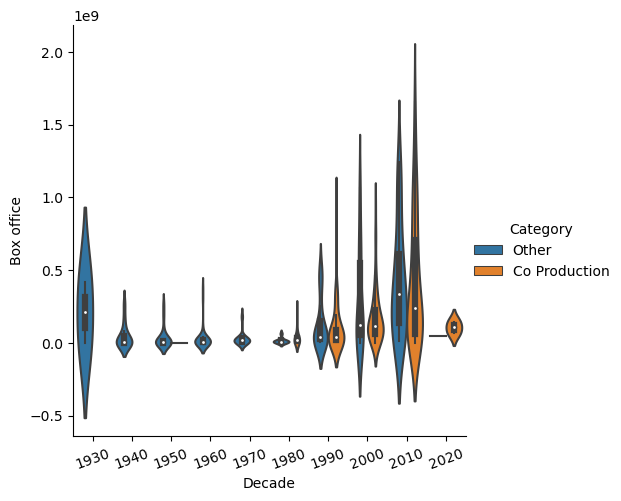

In [16]:
budget_violin = sns.catplot(x='Decade', y='Box office', hue='Category', kind='violin', data=disney)

plt.xticks(range(disney['Decade'].nunique()), 
           ['1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020'],
           rotation=20)

plt.show()

上图显示，在每个时间段，合作制作电影票房的中位数与其他电影相差不多，甚至在2000～2009，2010～2019两个时间段中，略低于其他电影的中位数。

分时间段来看：

（1）2010～2019，合作制作电影票房的最大值、上四分位数均高于其他电影，但中位数和下四分位数较低，因此，合作制作电影的票房分布更广泛，但不总是更高。

（2）2000～2009，合作制作电影票房的分布更为集中，但中位数、上四分位数、最高值均低于其他电影。

（3）1990～1999，单部电影票房的最大值出现在合作制作电影之中，但合作制作电影票房的中位数与其他电影相差不大。

因此，不能得出合作制作电影票房更高的结论。

/Users/miaoxuzhou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


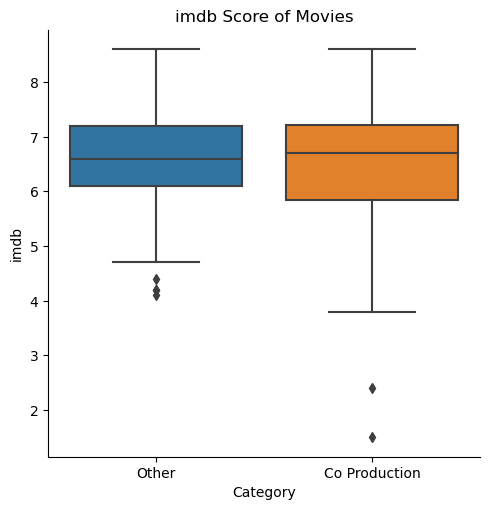

In [17]:
sns.catplot(x='Category', y='imdb', kind='box', data=disney)

plt.title('imdb Score of Movies')

plt.show()

从评分上看，合作制作电影imdb评分的中位数略高，但上四分位数、最高值与其他电影相差不大，最低值远低于其他电影。

不能得出合作制作电影评分更高的结论。

### 因此，从预算、票房、口碑三方面来看，合作制作电影不一定是大片。

# 2. “叫好不叫座”、“高票房低口碑”的现象存在吗？请从直观的可视化结果和统计分析结果两个角度展开分析，对结果进行解读，且至少包括一个带有数据证据的例子（3分）

In [18]:
# 计算每部电影imdb、metascore和rotten_tomatoes评分在所有电影中的相对位次
# imdb代表大众口碑，metascore和rotten_tomatoes代表专业评审意见

disney['imdb_quantile'] = disney['imdb'].rank(ascending=False, method='min') / disney['imdb'].count()

disney['metascore_quantile'] = disney['metascore'].rank(ascending=False, method='min') / disney['metascore'].count()

# 先转化为float
disney['rt_float'] = (disney['rotten_tomatoes'].str.strip('%').astype(float) / 100).round(3)

disney['rt_quantile'] = disney['rt_float'].rank(ascending=False, method='min') / disney['rotten_tomatoes'].count()

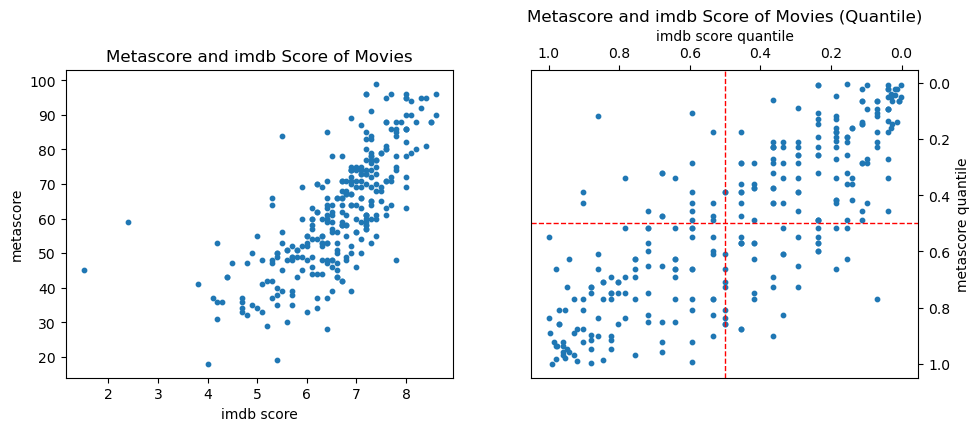

In [19]:
fig = plt.figure(figsize=(11, 4))

# 第一个子图
ax1 = fig.add_subplot(1, 2, 1)

ax1.scatter(disney['imdb'], disney['metascore'], s=10, label='metascore and imdb')

ax1.set_xlabel('imdb score')
ax1.set_ylabel('metascore')

ax1.set_title('Metascore and imdb Score of Movies')

# 第二个子图
ax2 = fig.add_subplot(1, 2, 2)

ax2.scatter(disney['imdb_quantile'], disney['metascore_quantile'], s=10, label='metascore and imdb(quantile)')

ax2.xaxis.set_ticks_position('top')  #将x轴的位置设置在顶部
ax2.invert_xaxis()  #x轴反向

ax2.yaxis.set_ticks_position('right')  #将y轴的位置设置在右边
ax2.invert_yaxis()  #y轴反向

ax2.xaxis.set_label_position('top')
ax2.set_xlabel('imdb score quantile')

ax2.yaxis.set_label_position('right')
ax2.set_ylabel('metascore quantile')

ax2.axhline(y=0.5, c='red', ls='--', lw=1)
ax2.axvline(x=0.5, c='red', ls='--', lw=1)

ax2.set_title('Metascore and imdb Score of Movies (Quantile)')

plt.show()

第二个子图的左上角代表，metascore评分靠前（位于前50%），但imdb评分靠后（位于后50%）的电影，即“叫好不叫座”的电影。

In [20]:
# 列出上述“叫好不叫座”的电影

movies1 = disney[(disney['metascore_quantile'] < 0.5) & (disney['imdb_quantile'] > 0.5)]

movies1 = movies1[['title', 'Release date', 'metascore', 'imdb', 'metascore_quantile', 'imdb_quantile']]

# 计算imdb、metascore评分相对位次的差值

movies1['difference'] = movies1['imdb_quantile'] - movies1['metascore_quantile']

movies1 = movies1.sort_values('difference', ascending=False)

# 设置显示位数

display(movies1.style.format({
    'metascore': '{:.0f}',
    'imdb': '{:.1f}',
    'imdb_quantile': '{:.2%}',
    'metascore_quantile': '{:.2%}',
    'difference': '{:.2%}'
}))

,title,Release date,metascore,imdb,metascore_quantile,imdb_quantile,difference
426,Black Is King,2020-07-31,84,5.5,11.95%,85.85%,73.90%
140,Unidentified Flying Oddball,1979-07-19,66,5.3,38.91%,90.09%,51.19%
9,The Three Caballeros,1944-12-21,85,6.4,10.92%,59.43%,48.51%
147,Popeye,1980-12-06,64,5.3,42.66%,90.09%,47.43%
376,Into the Woods,2014-12-08,69,5.9,33.79%,78.30%,44.51%
155,Tex,1982-07-30,78,6.5,17.41%,53.54%,36.13%
127,Freaky Friday,1976-12-20,70,6.2,32.08%,67.92%,35.84%
265,Freaky Friday,2003-08-04,70,6.2,32.08%,67.92%,35.84%
279,Aliens of the Deep,2005-01-28,71,6.4,28.67%,59.43%,30.77%
13,Melody Time,1948-05-27,69,6.3,33.79%,64.15%,30.36%


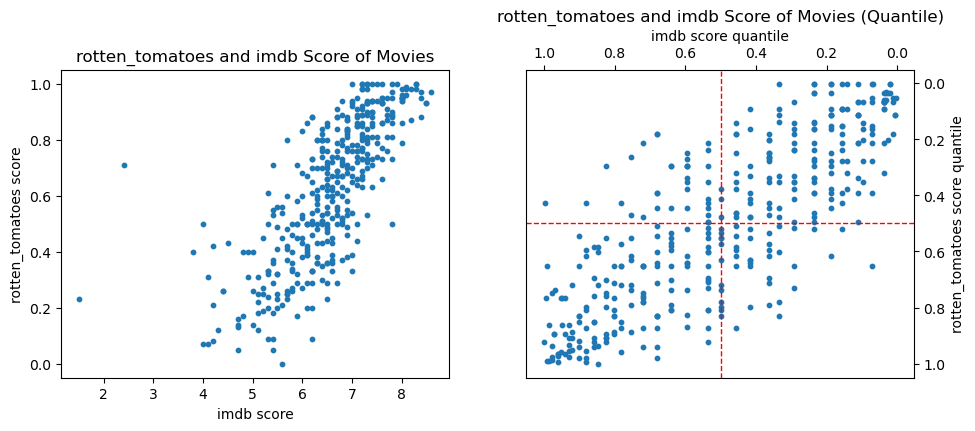

In [21]:
fig = plt.figure(figsize=(11, 4))

# 第一个子图

ax1 = fig.add_subplot(1, 2, 1)

ax1.scatter(disney['imdb'], disney['rt_float'], s=10, label='rotten_tomatoes and imdb')

ax1.set_xlabel('imdb score')
ax1.set_ylabel('rotten_tomatoes score')

ax1.set_title('rotten_tomatoes and imdb Score of Movies')

# 第二个子图

ax2 = fig.add_subplot(1, 2, 2)

ax2.scatter(disney['imdb_quantile'], disney['rt_quantile'], s=10, label='rotten_tomatoes and imdb(quantile)')

ax2.xaxis.set_ticks_position('top')  #将x轴的位置设置在顶部
ax2.invert_xaxis()  #x轴反向

ax2.yaxis.set_ticks_position('right')  #将y轴的位置设置在右边
ax2.invert_yaxis()  #y轴反向

ax2.xaxis.set_label_position('top')
ax2.set_xlabel('imdb score quantile')

ax2.yaxis.set_label_position('right')
ax2.set_ylabel('rotten_tomatoes score quantile')

ax2.axhline(y=0.5, c='red', ls='--', lw=1)
ax2.axvline(x=0.5, c='red', ls='--', lw=1)

ax2.set_title('rotten_tomatoes and imdb Score of Movies (Quantile)')

plt.show()

第二个子图的左上角代表，rotten_tomatoes评分靠前（位于前50%），但imdb评分靠后（位于后50%）的电影，同样是“叫好不叫座”的电影。

In [22]:
# 列出上述“叫好不叫座”的电影

movies2 = disney[(disney['rt_quantile'] < 0.5) & (disney['imdb_quantile'] > 0.5)]

# 计算imdb、metascore评分相对位次的差值

movies2 = movies2[['title', 'Release date', 'rt_float', 'imdb', 'rt_quantile', 'imdb_quantile']]
movies2['difference'] = movies2['imdb_quantile'] - movies2['rt_quantile']

movies2.sort_values('difference', ascending=False, inplace=True)

# 设置显示位数

display(movies2.style.format({
    'rt_float': '{:.2f}',
    'imdb': '{:.1f}',
    'imdb_quantile': '{:.2%}',
    'rt_quantile': '{:.2%}',
    'difference': '{:.2%}'
}))

,title,Release date,rt_float,imdb,rt_quantile,imdb_quantile,difference
309,Hannah Montana and Miley Cyrus: Best of Both Worlds Concert,2008-02-01,0.71,2.4,42.71%,99.76%,57.05%
113,Herbie Rides Again,1974-06-06,0.80,5.7,29.67%,82.31%,52.64%
62,Son of Flubber,1963-01-16,0.86,6.1,21.48%,71.93%,50.45%
127,Freaky Friday,1976-12-20,0.88,6.2,18.16%,67.92%,49.77%
265,Freaky Friday,2003-08-04,0.88,6.2,18.16%,67.92%,49.77%
99,The Barefoot Executive,1971-03-17,0.83,6.0,26.34%,75.47%,49.13%
192,White Fang 2: Myth of the White Wolf,1994-04-15,0.71,5.4,42.71%,87.97%,45.26%
376,Into the Woods,2014-12-08,0.71,5.9,42.71%,78.30%,35.59%
13,Melody Time,1948-05-27,0.80,6.3,29.67%,64.15%,34.48%
104,"Now You See Him, Now You Don't",1972-07-12,0.80,6.3,29.67%,64.15%,34.48%


In [23]:
# 将两表合并，列出所有“叫好不叫座”的电影

movies = pd.merge(movies1, movies2, 
                  on=['title', 'Release date', 'imdb', 'imdb_quantile'], how='outer',
                  suffixes=['_between imdb and metascore', '_between imdb and rotten_tomatoes'])

movies = movies.rename(columns={'rt_float': 'rotten_tomatoes'})

movies = movies.set_index('title')

movies = movies.reindex(columns=['Release date', 'imdb', 'metascore', 'rotten_tomatoes', 'difference_between imdb and rotten_tomatoes', 'difference_between imdb and metascore'])

movies.sort_values(['difference_between imdb and rotten_tomatoes', 'difference_between imdb and metascore'],  
                   ascending=False, inplace=True)

display(movies.style.format({
    'rotten_tomatoes': '{:.2f}',
    'imdb': '{:.1f}',
    'metascore': '{:.0f}',
    'difference_between imdb and rotten_tomatoes': '{:.2f}',
    'difference_between imdb and metascore': '{:.2f}'
}))

,Release date,imdb,metascore,rotten_tomatoes,difference_between imdb and rotten_tomatoes,difference_between imdb and metascore
title,,,,,,
Hannah Montana and Miley Cyrus: Best of Both Worlds Concert,2008-02-01,2.4,nan,0.71,0.57,nan
Herbie Rides Again,1974-06-06,5.7,nan,0.80,0.53,nan
Son of Flubber,1963-01-16,6.1,nan,0.86,0.50,nan
Freaky Friday,1976-12-20,6.2,70,0.88,0.50,0.36
Freaky Friday,2003-08-04,6.2,70,0.88,0.50,0.36
The Barefoot Executive,1971-03-17,6.0,nan,0.83,0.49,nan
White Fang 2: Myth of the White Wolf,1994-04-15,5.4,nan,0.71,0.45,nan
Into the Woods,2014-12-08,5.9,69,0.71,0.36,0.45
Melody Time,1948-05-27,6.3,69,0.80,0.34,0.30


Text(0.5, 1.0, 'Box Office and imdb Score of Movies')

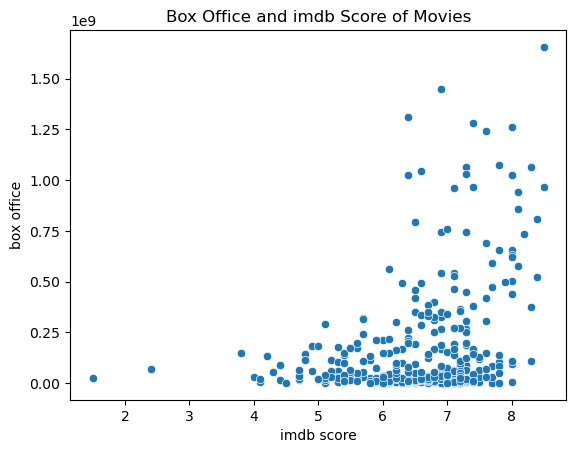

In [24]:
# 电影票房与imdb评分的关系

sns.scatterplot(x='imdb', y='Box office', data=disney)

plt.xlabel('imdb score')
plt.ylabel('box office')

plt.title('Box Office and imdb Score of Movies')

In [25]:
# 以十年为周期，按照年代，计算每部电影在十年中的票房位次

disney['Box office quantile'] = \
    disney.groupby('Decade')['Box office'].transform(
    lambda x: (x.rank(ascending=False) - 1) / x.count())

# 数据太多，分为20世纪和21世纪两张图展示

disney['Century'] = disney['Decade'].apply(lambda x: 20 if x<2000 else 21).astype(int)

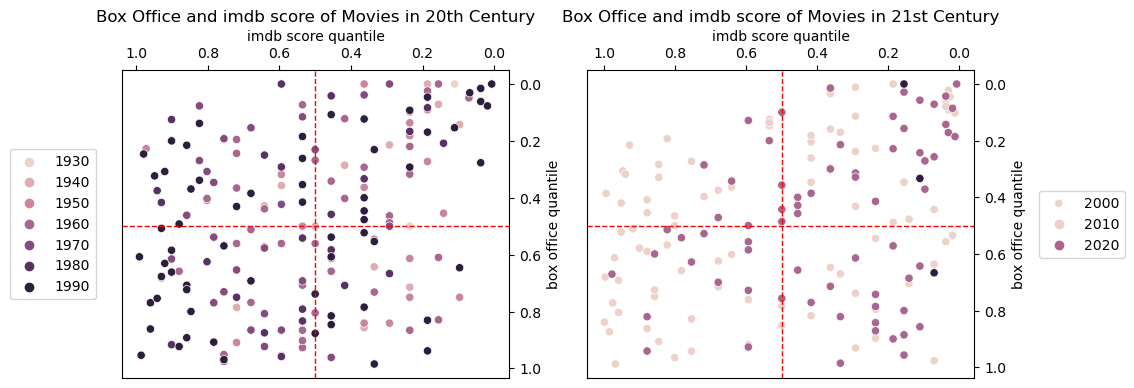

In [26]:
fig = plt.figure(figsize = (11, 4))

# 第一个子图，显示20世纪电影

ax1 = fig.add_subplot(1, 2, 1)

sns.scatterplot(x='imdb_quantile', y='Box office quantile', 
            hue='Decade', data=disney[disney['Century'] == 20],
            ax=ax1)

ax1.xaxis.set_ticks_position('top')  #将x轴的位置设置在顶部
ax1.invert_xaxis()  #x轴反向

ax1.yaxis.set_ticks_position('right')  #将y轴的位置设置在右边
ax1.invert_yaxis()  #y轴反向

ax1.xaxis.set_label_position('top')
ax1.set_xlabel('imdb score quantile')

ax1.yaxis.set_label_position('right')
ax1.set_ylabel('box office quantile')

ax1.axhline(y=0.5, c='red', ls='--', lw=1)
ax1.axvline(x=0.5, c='red', ls='--', lw=1)

ax1.legend(loc='center right', bbox_to_anchor=[-0.05, 0.5])

ax1.set_title('Box Office and imdb score of Movies in 20th Century')

# 第二个子图，显示21世纪电影

ax2 = fig.add_subplot(1, 2, 2)

sns.scatterplot(x='imdb_quantile', y='Box office quantile', 
            hue='Decade', data=disney[disney['Century'] == 21],
            ax=ax2)

ax2.xaxis.set_ticks_position('top')  #将x轴的位置设置在顶部
ax2.invert_xaxis()  #x轴反向

ax2.yaxis.set_ticks_position('right')  #将y轴的位置设置在右边
ax2.invert_yaxis()  #y轴反向

ax2.xaxis.set_label_position('top')
ax2.set_xlabel('imdb score quantile')

ax2.yaxis.set_label_position('right')
ax2.set_ylabel('box office quantile')

ax2.axhline(y=0.5, c='red', ls='--', lw=1)
ax2.axvline(x=0.5, c='red', ls='--', lw=1)

ax2.legend(loc='center left', bbox_to_anchor=[1.15, 0.5],
          labels=['2000', '2010', '2020'])

ax2.set_title('Box Office and imdb score of Movies in 21st Century')

plt.show()

两个子图的左上角均代表，Box Office排名靠前（位于前50%），但imdb评分靠后（位于后50%）的电影，即“高票房低口碑”的电影。

In [27]:
# 列出上述“高票房低口碑”的电影

movies3 = disney[(disney['Box office quantile'] < 0.5) & (disney['imdb_quantile'] > 0.5)]\
    [['title', 'Release date', 'imdb', 'Box office']]

# 计算票房、imdb评分相对位次的差值

movies3['difference'] = disney['imdb_quantile'] - disney['Box office quantile']

# 设置显示位数

display(movies3.style.format({
    'imdb': '{:.1f}',
    'Box office': '{:.0f}',
    'difference': '{:.2%}'
}))

,title,Release date,imdb,Box office,difference
9,The Three Caballeros,1944-12-21,6.4,3355000,23.72%
10,Make Mine Music,1946-04-20,6.3,3275000,21.29%
18,Alice in Wonderland,1951-07-26,6.4,5600000,27.62%
33,Westward Ho the Wagons!,1956-12-20,5.8,2750000,39.28%
41,The Shaggy Dog,1959-03-19,4.4,12300000,74.44%
55,Babes in Toyland,1961-12-14,6.3,4600000,20.25%
57,Bon Voyage!,1962-05-17,5.8,5000000,39.94%
62,Son of Flubber,1963-01-16,6.1,22100000,47.54%
78,"Lt. Robin Crusoe, U.S.N.",1966-06-25,6.1,22565634,52.42%
91,The Love Bug,1968-12-24,6.5,51264000,46.22%


# 3. 哪些导演（'Directed by'）拍的电影的平均评价最高？(2分）

In [28]:
### 拆分导演字段，拆分后，有多位导演的电影将对应多行数据，每一行数据是其中一个导演

# 删去字段中不必要的字符
def strip_str(x):
    if x is np.nan or x is None:
        pass
    else:
        x = x.strip('[').strip(']').strip(' ').strip('\'')
        if x == '':
            x = None
        elif '(' in x and ')' in x:
            x = delete_brackets(x)
        else:
            x = x
    return x

# 删去括号中的内容（有些数据为'David Hand (supervising)')
def delete_brackets(x):
    start = x.find('(')
    end = x.find(')')
    return x[:start] + x[end+1:]

# 将导演字段拆分为列表
directors = disney['Directed by'].str.split(',', expand=True)

# 删去不必要的字符
directors = directors.applymap(strip_str)

# 将拆分后的数据分为多行
directors = directors.stack()

directors = directors.reset_index(level=1, drop=True)

directors.name = 'director'

# 得到新的disney数据集
disney_new = disney.drop(['Directed by'], axis=1).join(directors).reset_index(drop=True)

# 删去无意义的数据（有部分数据的导演为'Animation:', 'Live action:', 空字符）
index_list = disney_new[disney_new['director'].isin(['Animation:', 'Live action:', ''])].index

disney_new = disney_new.drop(index_list)

In [29]:
# 计算各位导演执导电影的平均imdb评分
imdb_director_mean = disney_new.groupby('director')['imdb'].mean().sort_values(ascending=False)

# 得到平均分数前十位的导演
top_10_imdb_director_mean = imdb_director_mean.head(10)

# 重新索引
imdb_df = pd.DataFrame(imdb_director_mean).reset_index()
top_10_imdb_df = pd.DataFrame(top_10_imdb_director_mean).reset_index()

# 计算各位导演执导电影的平均metascore评分
metascore_director_mean = disney_new.groupby('director')['metascore'].mean().sort_values(ascending=False)

# 得到平均分数前十位的导演
top_10_metascore_director_mean = metascore_director_mean.head(10)

# 重新索引
metascore_df = pd.DataFrame(metascore_director_mean).reset_index()
top_10_metascore_df = pd.DataFrame(top_10_metascore_director_mean).reset_index()

# 计算各位导演执导电影的平均rotten_tomatoes评分
rt_director_mean = disney_new.groupby('director')['rt_float'].mean().sort_values(ascending=False)

# 得到平均分数前十位的导演
top_10_rt_director_mean = rt_director_mean.head(10)

# 重新索引
rt_df = pd.DataFrame(rt_director_mean).reset_index()
top_10_rt_df = pd.DataFrame(top_10_rt_director_mean).reset_index()

In [30]:
# 合并上述三份数据
all_df = imdb_df.merge(metascore_df, on='director', how='inner')
all_df = all_df.merge(rt_df, on='director', how='inner')

# 删除含有Nan值的数据行（即有一项评分缺失的数据行）
all_df = all_df.dropna().reset_index(drop=True)

Text(0.5, 1.0, 'TOP 10 Directors of Metascore Mean Score')

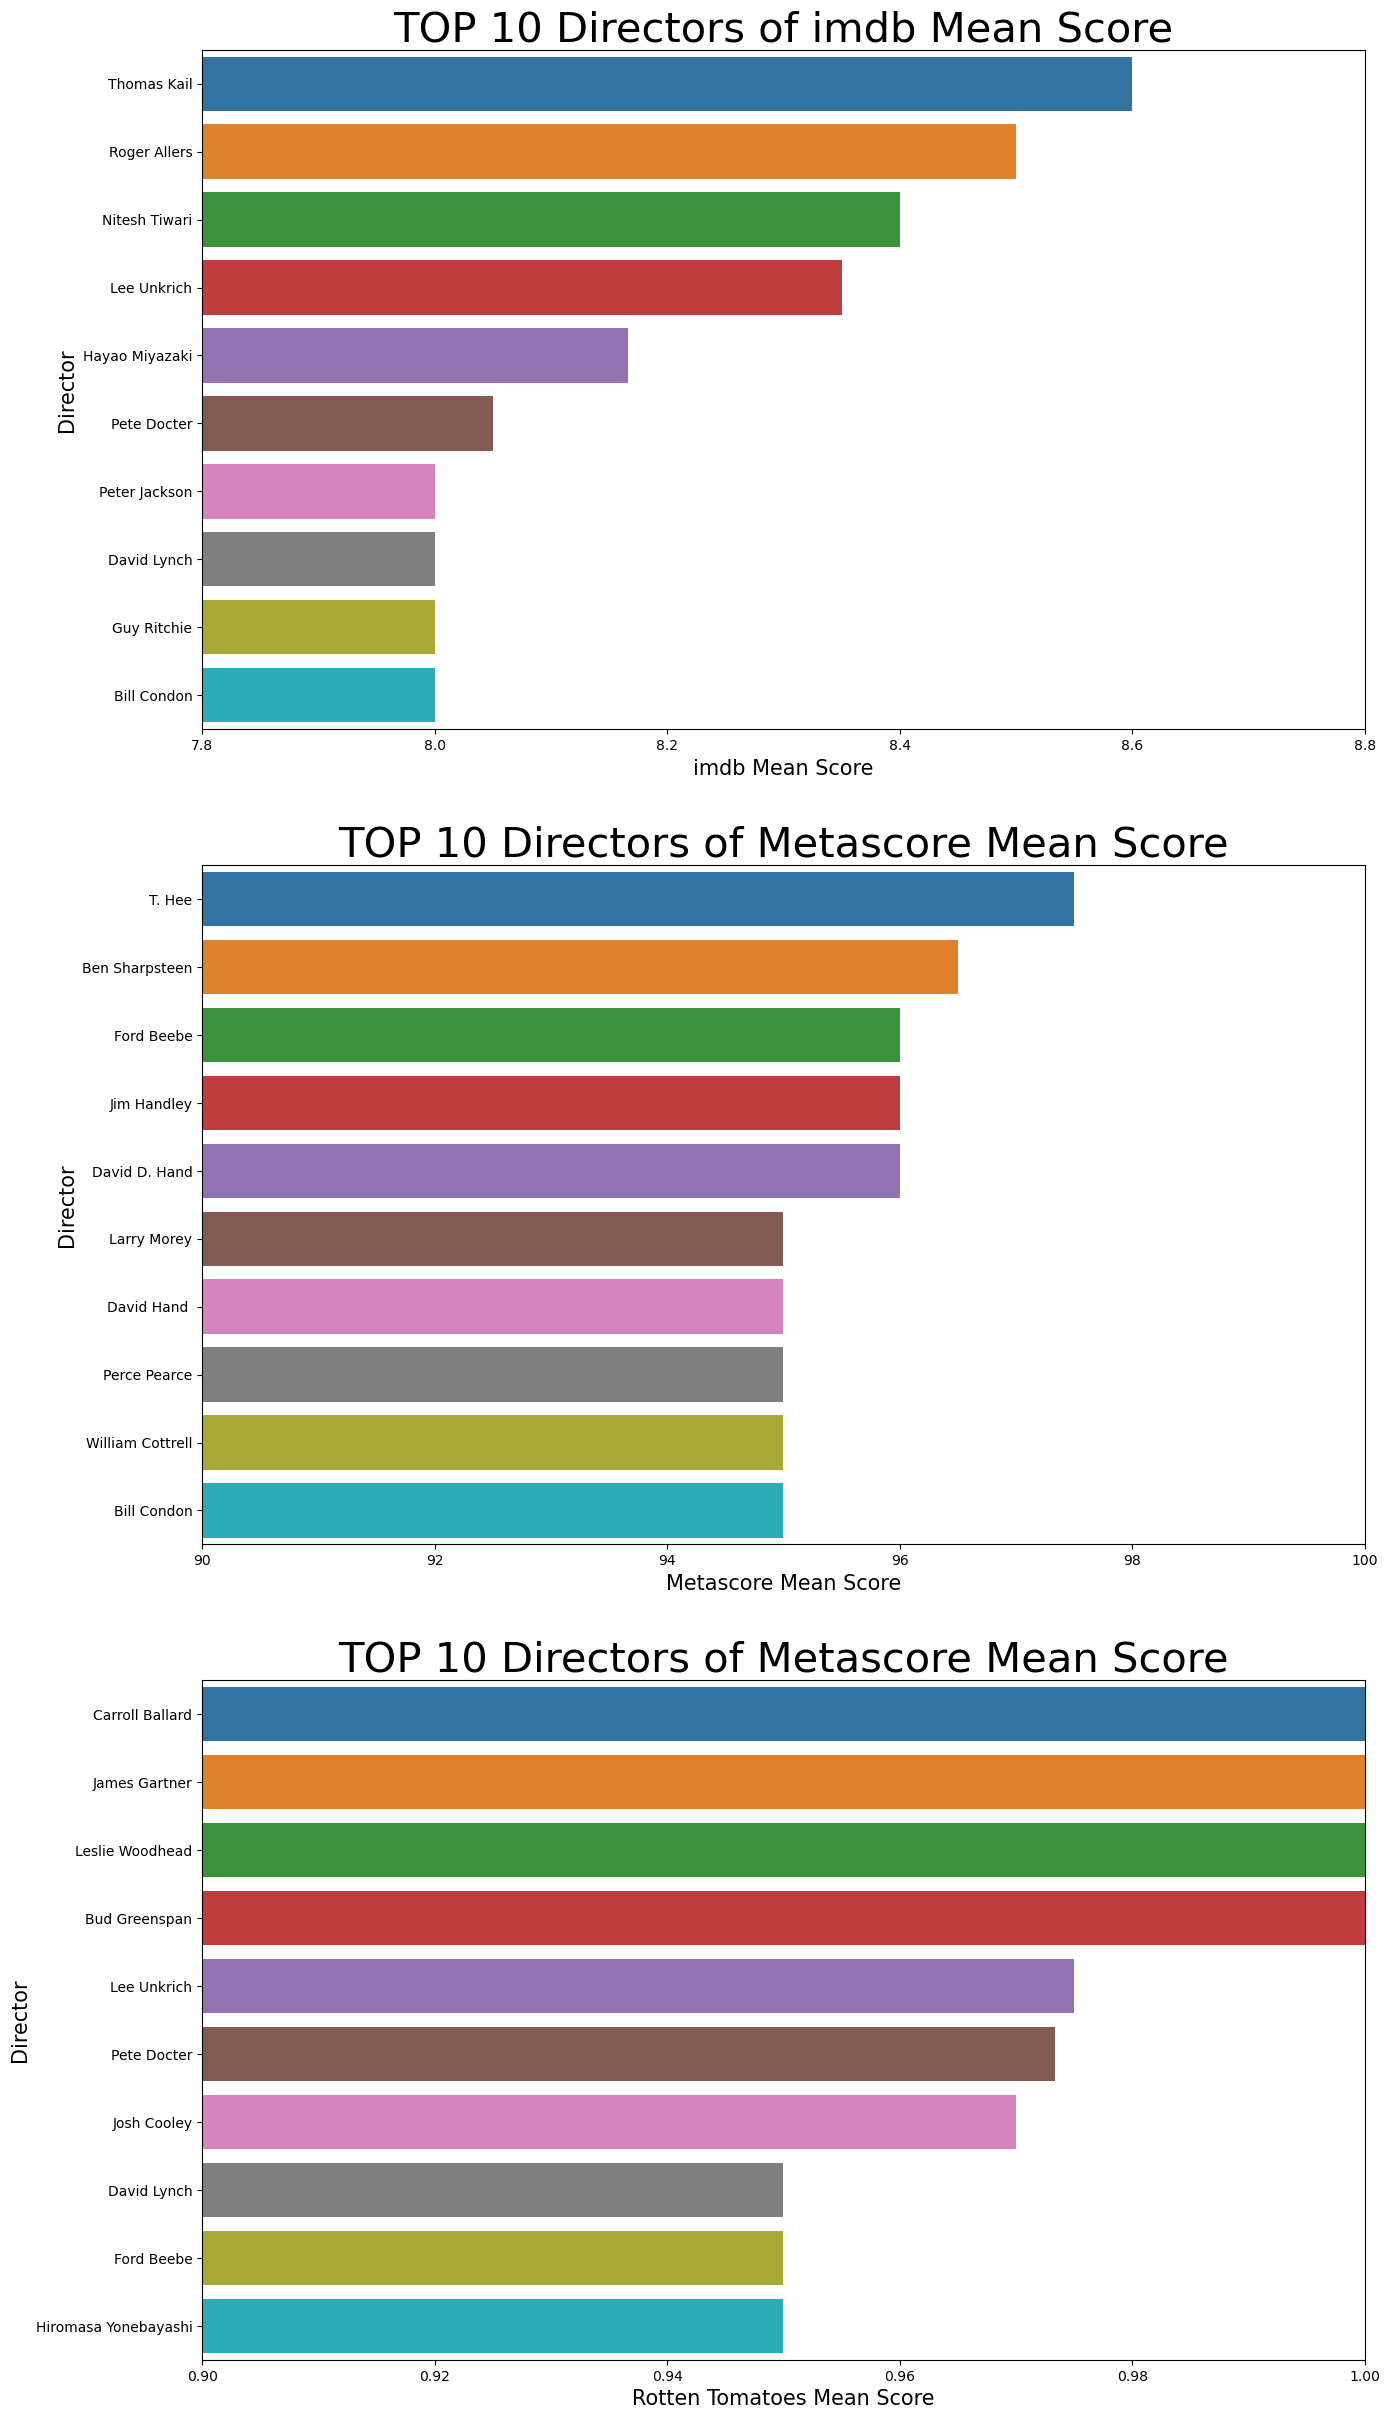

In [31]:
fig = plt.figure(figsize=(15, 30))

# 第一个子图，显示imdb评分评分排名前十位的导演，及分数

ax1 = fig.add_subplot(3, 1, 1)
sns.barplot(x='imdb', y='director', data=top_10_imdb_df, ax=ax1)

ax1.set_ylabel('Director', fontsize=15)
ax1.set_xlabel('imdb Mean Score', fontsize=15)

ax1.set_xlim(7.8, 8.8)

ax1.set_title('TOP 10 Directors of imdb Mean Score', fontsize=30)

# 第二个子图，显示metascore评分评分排名前十位的导演，及分数

ax2 = fig.add_subplot(3, 1, 2)
sns.barplot(x='metascore', y='director', data=top_10_metascore_df, ax=ax2)

ax2.set_ylabel('Director', fontsize=15)
ax2.set_xlabel('Metascore Mean Score', fontsize=15)

ax2.set_xlim(90, 100)

ax2.set_title('TOP 10 Directors of Metascore Mean Score', fontsize=30)

# 第三个子图，显示rotten_tomatoes评分评分排名前十位的导演，及分数

ax3 = fig.add_subplot(3, 1, 3)
sns.barplot(x='rt_float', y='director', data=top_10_rt_df, ax=ax3)

ax3.set_ylabel('Director', fontsize=15)
ax3.set_xlabel('Rotten Tomatoes Mean Score', fontsize=15)

ax3.set_xlim(0.9, 1.0)

ax3.set_title('TOP 10 Directors of Metascore Mean Score', fontsize=30)

### 以上计算了在三种评分里排名前十位的导演，下面将三种评分综合计算，得出综合分数排名前十位的导演。

计算方法为：对三种评分进行Max-Min归一化处理，再计算加权平均分。

以上计算的前提是：导演在三种评分里均有分数，因此，缺失一项分数的导演不在范围之内。

In [32]:
def normalize(col):
    new_col = (col - np.min(col)) / (np.max(col) - np.min(col))
    return new_col

all_df['mean score of three scores'] = \
    (normalize(all_df['imdb']) + normalize(all_df['metascore']) + normalize(all_df['rt_float'])) / 3

In [33]:
all_df.sort_values('mean score of three scores', ascending=False).head(10)

,director,imdb,metascore,rt_float,mean score of three scores
6,Bill Condon,8.000000,95.000000,0.940000,0.943020
1,Lee Unkrich,8.350000,86.500000,0.975000,0.937473
0,Roger Allers,8.500000,88.000000,0.930000,0.935606
14,Ford Beebe,7.700000,96.000000,0.950000,0.935454
15,Jim Handley,7.700000,96.000000,0.950000,0.935454
16,David D. Hand,7.700000,96.000000,0.950000,0.935454
3,Pete Docter,8.050000,86.750000,0.973333,0.922669
2,Hayao Miyazaki,8.166667,87.333333,0.916667,0.911169
40,Samuel Armstrong,7.400000,94.333333,0.943333,0.910860
5,Guy Ritchie,8.000000,86.000000,0.950000,0.908793


# 4. 请找出指导作品最多的导演（'Directed by'）。请用直观的可视化方法，对比展示他所有的作品与其他人作品在支出（预算）、收入（票房）上的差异（2分）

# 请先使用删去不存在收入支出的数据。

In [34]:
# 删去不存在收入支出的数据

index_list = disney_new[disney_new['Budget'].isnull() | disney_new['Box office'].isnull()].index

economic_disney = disney_new.drop(index_list)

In [35]:
# 找出执导作品最多的导演，显示前三项，以防出现并列

economic_disney.groupby('director').size().sort_values(ascending=False).head(3)

director
Hamilton Luske     11
Wilfred Jackson    10
Clyde Geronimi      8
dtype: int64

In [36]:
# 提取有用信息

Hamilton_data = economic_disney[economic_disney['director'] == 'Hamilton Luske']\
    [['title', 'Budget', 'Box office']]

other_data = economic_disney[economic_disney['director'] != 'Hamilton Luske']\
    [['title', 'Budget', 'Box office']]

Hamilton_data['director'] = 'Hamilton Luske'
other_data['director'] = 'Other'

data = pd.concat([Hamilton_data, other_data], axis=0)

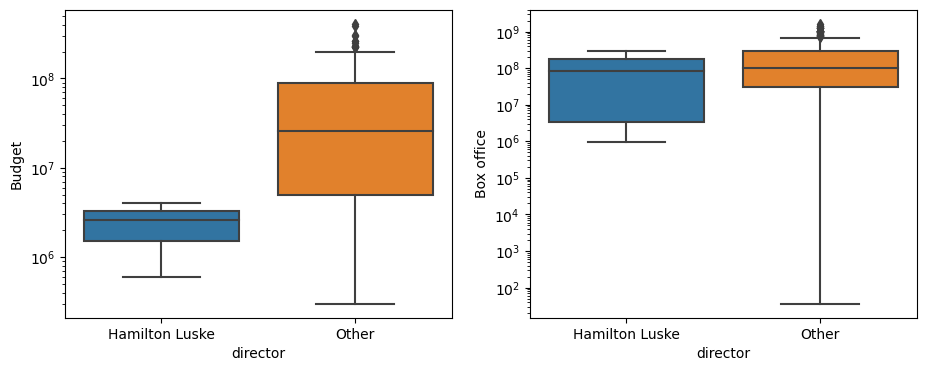

In [37]:
fig = plt.figure(figsize=(11, 4))

ax1 = fig.add_subplot(1, 2, 1)

sns.boxplot(x='director', y='Budget', data=data, ax=ax1)

ax1.set_yscale('log')

ax2 = fig.add_subplot(1, 2, 2)

sns.boxplot(x='director', y='Box office', data=data, ax=ax2)

ax2.set_yscale('log')

从上图看出，Hamilton Luske导演的作品预算很低，但票房不俗，是一名在市场价值上很成功的导演。

In [38]:
data.groupby('director')[['Budget', 'Box office']].describe()

Budget                                                   \
                count          mean           std       min        25%   
director                                                                 
Hamilton Luske   11.0  2.484545e+06  1.144914e+06  600000.0  1500000.0   
Other           366.0  5.926973e+07  7.206926e+07  300000.0  5000000.0   

                                                    Box office                \
                       50%         75%          max      count          mean   
director                                                                       
Hamilton Luske   2600000.0   3300000.0    4000000.0       11.0  1.003995e+08   
Other           25500000.0  90000000.0  410600000.0      366.0  2.231843e+08   

                                                                             \
                         std       min         25%         50%          75%   
director                                                                      
Hamilton Luske  1.126584e+08  960000.0   3487500.0  83300000.0  175500000.0   
Other           2.958568e+08      36.0  30900000.0  98750000.0  297825000.0   

                              
                         max  
director                      
Hamilton Luske  3.030000e+08  
Other           1.657000e+09

In [39]:
# 计算投资收益率ROI

Hamilton_data['ROI'] = Hamilton_data['Box office'] / Hamilton_data['Budget']
other_data['ROI'] = other_data['Box office'] / other_data['Budget']

ROI_data = Hamilton_data[['title', 'ROI']]
ROI_data = pd.concat([ROI_data, pd.DataFrame({'title': ['other'], 'ROI': [other_data['ROI'].mean()]})], 
                     axis=0, ignore_index=True)

<Axes: xlabel='ROI', ylabel='title'>

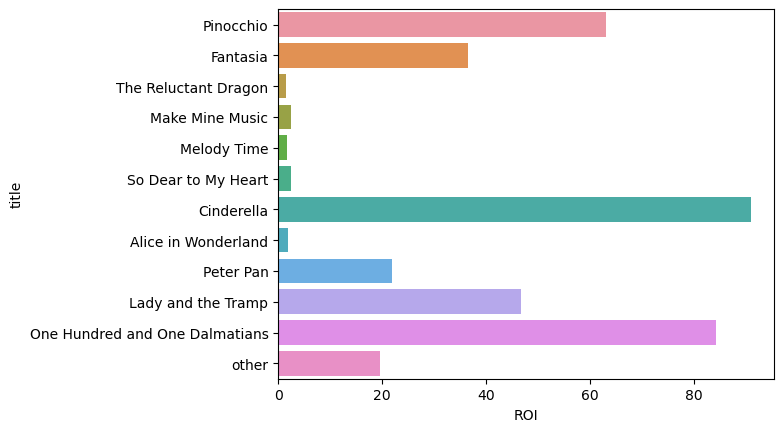

In [40]:
sns.barplot(x='ROI', y='title', data=ROI_data)